# Data Science Project : Analisis Data COVID19 di Dunia dan Asean

Covid19 adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.

## Library yang akan digunakan

1. json
2. numpy
3. pandas
4. requests

In [1]:
import json
import numpy as np
import pandas as pd
import requests

## Membuat Fungsi get API

In [2]:
# Buat fungsi python get_json dengan parameter api_url
# dengan kondisi jika status_code=200 maka fungsi tersebut akan mengembalikan value berupa python dictionary
# jika tidak, maka value yang dikembalikan adalah None
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

## Memanggil API COVID19

In [3]:
# Gunakan parameter record_date untuk mengambil data pada tanggal tertentu
# Hasil respon dimasukkan ke variabel df_covid_worldwide
# gunakan fungsi pd.io.json.json_normalize untuk mendapatkan dataframe
record_date = '2020-09-13'
covid_url = 'https://covid19-api.org/api/status?date='+ record_date
df_covid_worldwide = pd.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head(25))

   country          last_update    cases  deaths  recovered
0       US  2020-09-12T23:26:14  6479157  193539    2434658
1       IN  2020-09-12T23:26:14  4659984   77472    3624196
2       BR  2020-09-12T23:26:14  4282164  130396    3695158
3       RU  2020-09-12T23:26:14  1053663   18426     871000
4       PE  2020-09-12T23:26:14   716670   30470     544745
5       CO  2020-09-12T23:26:14   702088   22518     582694
6       MX  2020-09-12T23:26:14   658299   70183     547088
7       ZA  2020-09-12T23:26:14   648214   15427     576423
8       ES  2020-09-12T23:26:14   566326   29747     150376
9       AR  2020-09-12T23:26:14   546481   11263     409771
10      CL  2020-09-12T23:26:14   432666   11895     404919
11      FR  2020-09-12T23:26:14   402810   30902      90445
12      IR  2020-09-12T23:26:14   399940   23029     344516
13      GB  2020-09-12T23:26:14   367590   41712       1873
14      BD  2020-09-12T23:26:14   336044    4702     238271
15      SA  2020-09-12T23:26:14   325050

## Merubah Format Date

In [4]:
# Gunakan fungsi to_datetime dengan format YYYY-mm-dd HH:MM:SS untuk mengubah format kolom last_update
# Gunakan fungsi date() melalui fungsi lambda untuk mengubah bentuk datetime ke bentuk date setiap row-nya
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

## Mengambil Data Countries

In [5]:
# Membuat dataframe countries dengan memanggil variable countries_url ke api covid19-api.org
# Mengubah nama kolom alpha2 menjadi country, dan hanya mengambil kolom name dan country saja untuk dataframe countries dengan nama variable df_countries
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


## Merge Data COVID19 dan Coutries

In [6]:
# Gunakan fungsi merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries
# Gunakan kolom country untuk merge
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head(25))

   country last_update    cases  deaths  recovered  \
0       US  2020-09-12  6479157  193539    2434658   
1       IN  2020-09-12  4659984   77472    3624196   
2       BR  2020-09-12  4282164  130396    3695158   
3       RU  2020-09-12  1053663   18426     871000   
4       PE  2020-09-12   716670   30470     544745   
5       CO  2020-09-12   702088   22518     582694   
6       MX  2020-09-12   658299   70183     547088   
7       ZA  2020-09-12   648214   15427     576423   
8       ES  2020-09-12   566326   29747     150376   
9       AR  2020-09-12   546481   11263     409771   
10      CL  2020-09-12   432666   11895     404919   
11      FR  2020-09-12   402810   30902      90445   
12      IR  2020-09-12   399940   23029     344516   
13      GB  2020-09-12   367590   41712       1873   
14      BD  2020-09-12   336044    4702     238271   
15      SA  2020-09-12   325050    4240     301836   
16      PK  2020-09-12   300955    6373     288536   
17      TR  2020-09-12   289

## Menghitung Fatality Ratio

Menambahkan satu kolom tambahan yaitu fatality_ratio yang merupakan rasio antara kolom deaths dan cases.

In [7]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

## Negara-negara dengan Fatality Ratio Tertinggi

In [8]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

## Import Library Visualisasi

In [9]:
import matplotlib.pyplot as plt

## Visualisasi Negara dengan Fatality Ratio Tertinggi

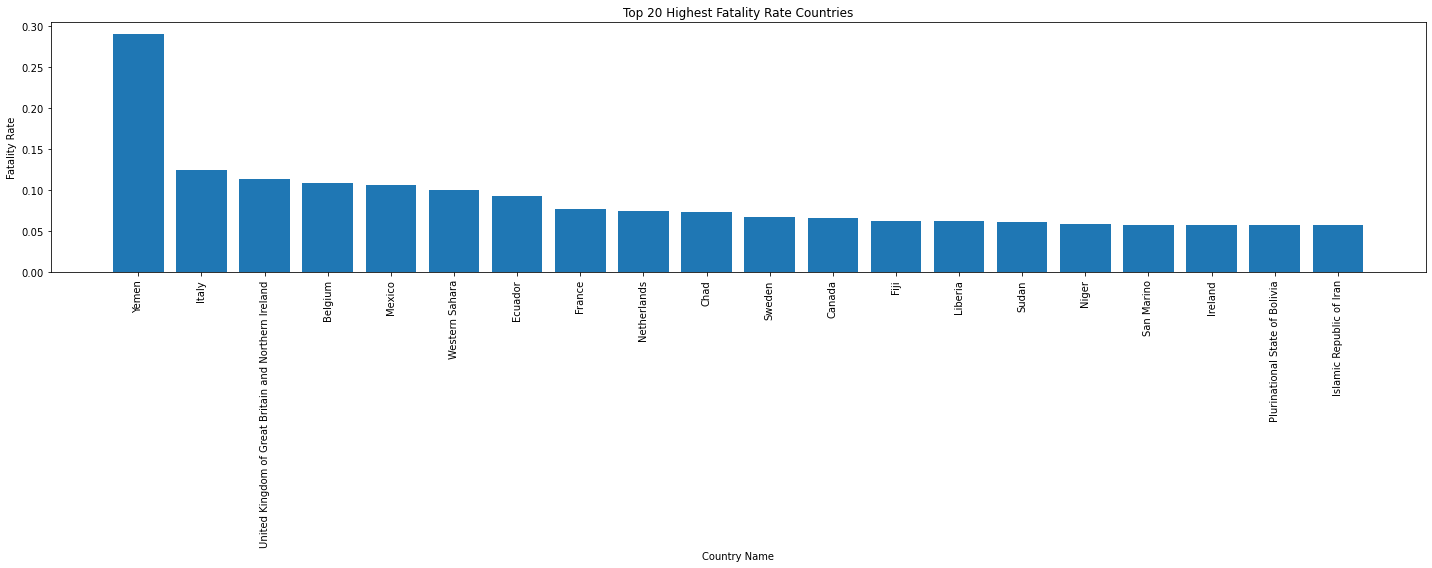

In [10]:
# Visualisasi menggunakan bar chart
# Label sumbu x diputar 90 derajat untuk menghindari bertumpuknya nama-nama negara pada posisi 0 derajat. 
import matplotlib.pyplot
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Menggabungkan Dataframe

Membandingkan kasus COVID19 di Indonesia (ID) dengan negara-negara tetangga yaitu 

    - MY -> Malaysia
    - SG -> Singapura
    - TH -> Thailand
    - VN -> Vietnam

In [11]:
# API Country dipanggil berkali-kali sebanyak negara yang akan dibandingkan
# Gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json()
# Gunakan fungsi datetime untuk merubah string ke bentuk datetime (YYYY-mm-dd HH:MM:SS) dan diubah ke format date
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1

print(df_covid_timeline_merged.head())

  country last_update  cases  deaths  recovered
0      VN  2020-09-13   1060      35        910
1      VN  2020-09-12   1060      35        902
2      VN  2020-09-11   1060      35        902
3      VN  2020-09-10   1059      35        893
4      VN  2020-09-09   1059      35        890


## Merge Data COVID19 dengan Data Country 


In [12]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

## Kasus COVID19 di ASEAN

In [13]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 8, 1))]

## Visualisasi Kasus COVID19 di ASEAN

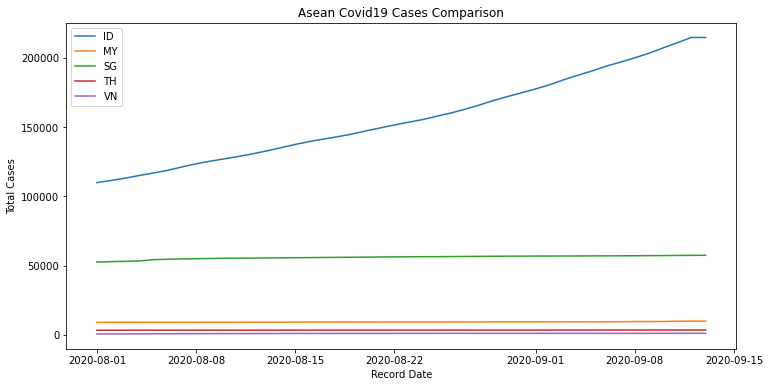

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label =country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()